# Community day

## Dealing w/ the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

In [2]:
df = pd.read_csv('./data/cholera-dataset.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
sex           303 non-null object
dh            303 non-null int64
rbp           303 non-null int64
c             298 non-null float64
seizures      303 non-null int64
vc            303 non-null int64
ia            303 non-null int64
bt0           303 non-null int64
fc            303 non-null int64
exposed_to    303 non-null int64
fever         303 non-null int64
cholera       303 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 30.8+ KB


In [4]:
# Checking nulls
df[df['c'].isnull()]

,age,sex,dh,rbp,c,seizures,vc,ia,bt0,fc,exposed_to,fever,cholera
99,53,Male,2,130,NaN,1,0,173,0,2,3,0,1
134,41,Female,1,126,NaN,0,1,163,0,2,0,0,1
135,49,Female,0,130,NaN,0,1,163,0,2,0,0,1
260,66,Female,0,178,NaN,1,1,165,1,1,2,0,0
298,57,Female,0,140,NaN,0,1,123,1,1,0,0,0


In [5]:
# As only 5 people have NaN's but they have relevant attributes, we fill it with the mean of cholesterol.
df = df.fillna(df['c'].mean())

In [6]:
# Looking for outliers
df.describe()

,age,dh,rbp,c,seizures,vc,ia,bt0,fc,exposed_to,fever,cholera
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.283828,0.966997,131.623762,246.067114,0.148515,0.528053,149.646865,0.326733,1.399340,0.729373,0.006601,0.544554
std,9.872631,1.032052,17.538143,51.688146,0.356198,0.525860,22.905161,0.469794,0.616226,1.022606,0.081110,0.498835
min,3.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,100.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,1.000000,1.000000


#### Conclusions from the summary
Half of the sample has cholera and nearly no one has fever. Few people with seizures.

In [ ]:
df.to_csv('data1.csv')

## Cholera and dehydratation

#### Zeppelin

![Zeppelin results](./screenshots/dh.PNG)

## Disgusting correlations

In [12]:
correlations = df[['ia','fc','vc']].corr(method="pearson")
correlations

,ia,fc,vc
ia,1.000000,0.386784,0.044123
fc,0.386784,1.000000,0.093045
vc,0.044123,0.093045,1.000000


In [20]:
# as there's barely relation we will separe cholera patients and non cholera patients
chol = df[df['cholera']==1]
noChol = df[df['cholera']==0]

In [21]:
correlations1 = chol[['ia','fc','vc']].corr(method="pearson")
correlations1

,ia,fc,vc
ia,1.000000,0.223528,0.031035
fc,0.223528,1.000000,0.138237
vc,0.031035,0.138237,1.000000


In [22]:
correlations2 = noChol[['ia','fc','vc']].corr(method="pearson")
correlations2

,ia,fc,vc
ia,1.000000,0.350811,-0.059244
fc,0.350811,1.000000,-0.056051
vc,-0.059244,-0.056051,1.000000


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

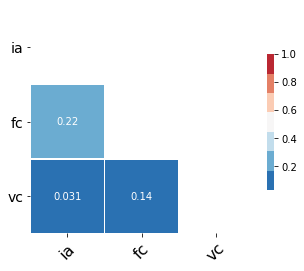

In [28]:
mask = np.zeros_like(correlations1)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("RdBu_r", 7)
sns.heatmap(correlations1, annot=True, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=360, fontsize=14)
plt.xticks(rotation=45, fontsize=16)

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

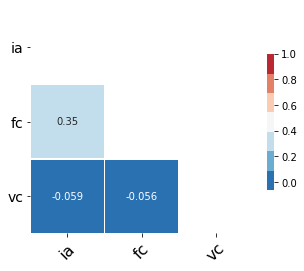

In [26]:
mask = np.zeros_like(correlations2)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.color_palette("RdBu_r", 7)
sns.heatmap(correlations2, annot=True, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=360, fontsize=14)
plt.xticks(rotation=45, fontsize=16)

In [29]:
# no conclusions

(array([ 60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 9 Text yticklabel objects>)

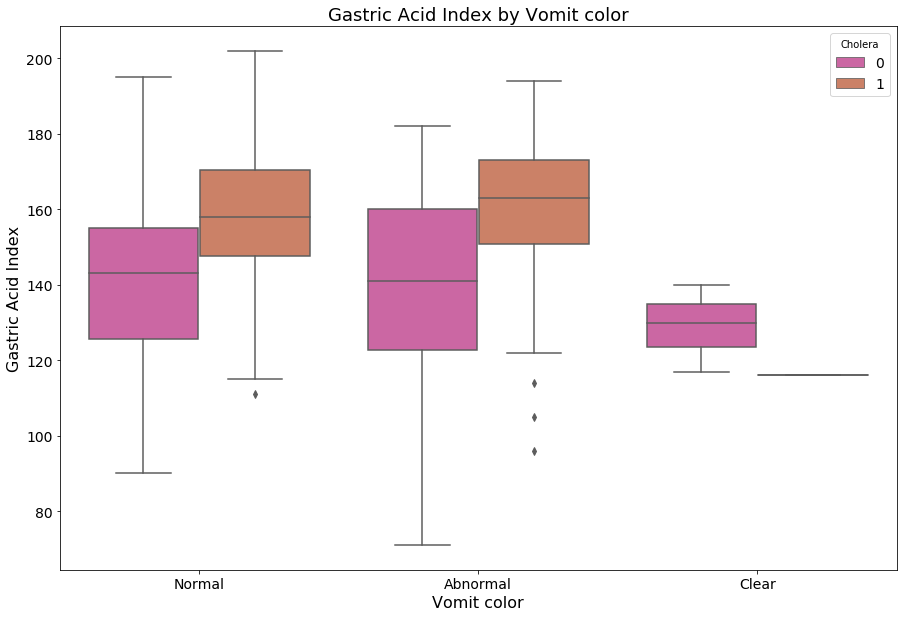

In [40]:
f, ax = plt.subplots(figsize=(15,10))
colorpalette = sns.hls_palette(7,h=.9)
sns.boxplot(data = df, x= 'vc', y='ia', hue='cholera', palette=colorpalette)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title='Cholera')
plt.title("Gastric Acid Index by Vomit color", fontsize=18)
plt.xlabel("Vomit color", fontsize=16)
plt.ylabel("Gastric Acid Index", fontsize=16)
plt.xticks(np.arange(3), ('Normal','Abnormal','Clear') ,fontsize=14)
plt.yticks(fontsize=14)

(array([ 60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 9 Text yticklabel objects>)

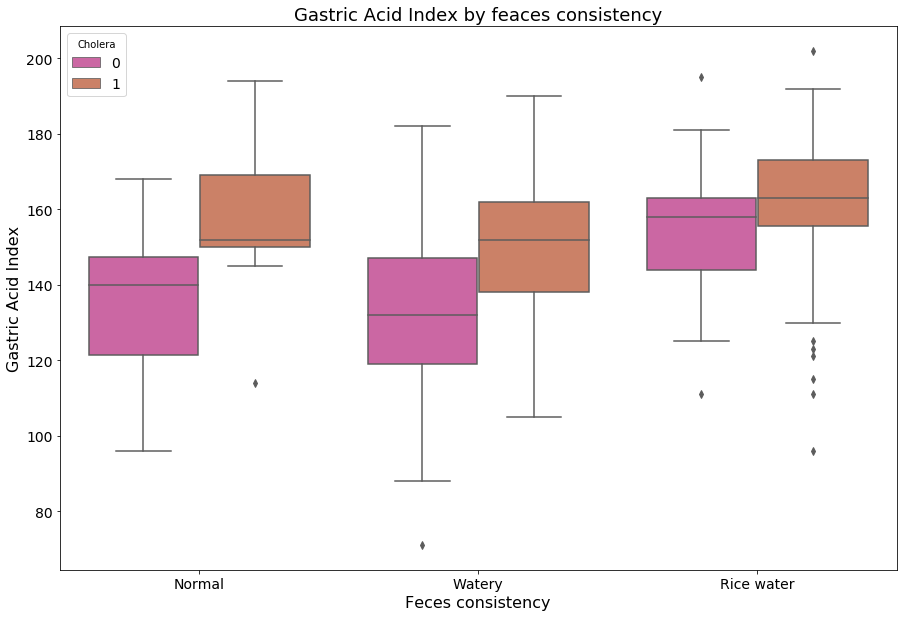

In [68]:
f, ax = plt.subplots(figsize=(15,10))
colorpalette = sns.hls_palette(7,h=.9)
sns.boxplot(data = df, x= 'fc', y='ia', hue='cholera', palette=colorpalette)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, title='Cholera')
plt.title("Gastric Acid Index by feaces consistency", fontsize=18)
plt.xlabel("Feces consistency", fontsize=16)
plt.ylabel("Gastric Acid Index", fontsize=16)
plt.xticks(np.arange(3), ('Normal','Watery','Rice water') ,fontsize=14)
plt.yticks(fontsize=14)

In [144]:
cross = pd.crosstab(df['ia'], df['fc'])
fnormal = cross[[0]]
fwatery = cross[[1]]
frice = cross[[2]]
freq = cross.reset_index()[['ia']]

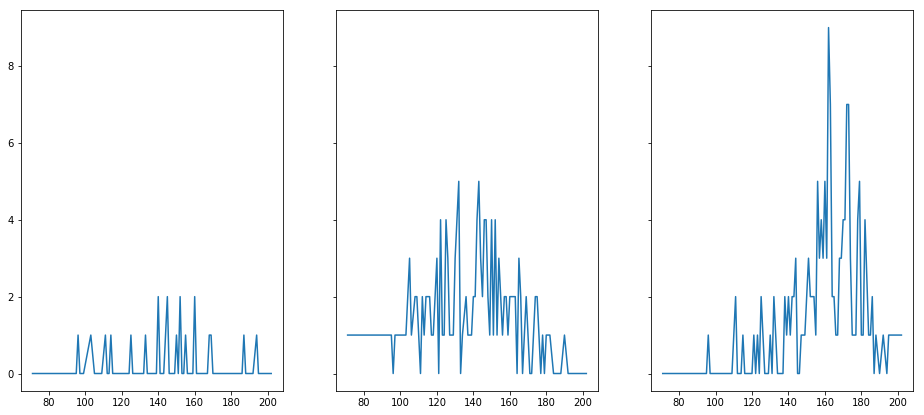

In [145]:
fig, ax= plt.subplots(1,3, figsize=(16,7), sharey=True)
ax[0].plot(fnormal)
ax[1].plot(fwatery)
ax[2].plot(frice)

In [146]:
cross1 = pd.crosstab(df['ia'], df['vc'])
vnormal = cross1[[0]]
vabnormal = cross1[[1]]
vclear = cross1[[2]]
freq = cross1.reset_index()[['ia']]

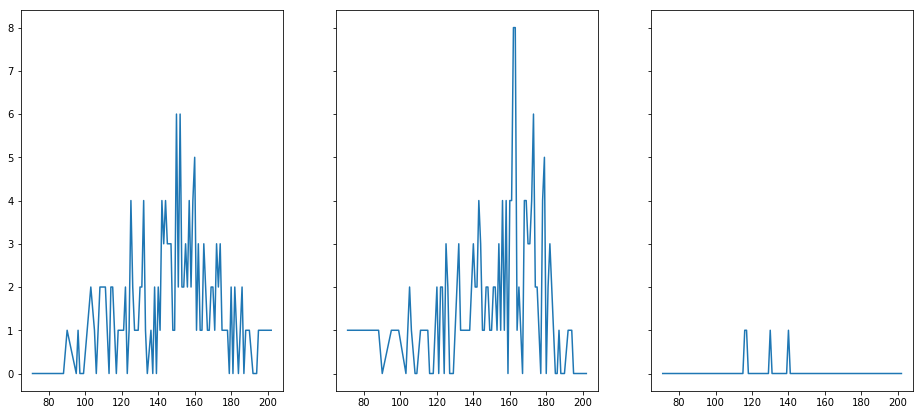

In [147]:
fig, ax= plt.subplots(1,3, figsize=(16,7), sharey=True)
ax[0].plot(vnormal)
ax[1].plot(vabnormal)
ax[2].plot(vclear)

## Conclusions

To analyze the relationship between GAI and these two variables we have used boxplots and distribution plots, as correlation did not work for discrete variables, in which we can observe:
1. Having cholera means having a greater GAI.
2. Having cholera means vomitting.
3. The greater the GAI the more likely the vomit color will be abnormal.
4. The greater the GAI the more likely the feces will be watery, and when even higher rice water.
5. Boxplots are useful but don't show frequence.

# Further research
![Zeppelin results](./screenshots/exposed.PNG)
![Zeppelin results](./screenshots/sex.PNG)
![Zeppelin results](./screenshots/fever.PNG)

## Stats analysis

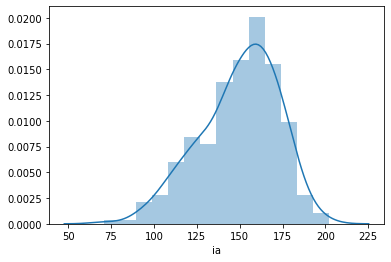

In [31]:
sns.distplot(df.ia)

In [33]:
stats.normaltest(df.ia)

NormaltestResult(statistic=13.46672289054534, pvalue=0.0011905243421222172)

In [ ]:
# p is too small to pass the normal distribution test (expected value btw 1 and 0.05 for a 95% confidence)
# assuming that ia = normal distribution = FALSE

In [38]:
stats.normaltest((df.ia)**2)

NormaltestResult(statistic=5.4691653699935205, pvalue=0.06492109399814462)

In [39]:
# as distribution slightly skewed towards a side, assume poisson distribution
# normal test for X**2 = passed therefore we can assume a chi squared distribution

H0:There is no statistically significant relationship between GAI and the feaces type. 

H1:There is a statistically significant relationship between GAI and the feaces type. 